In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, AveragePooling2D
# from keras_visualizer import visualizer 
import tensorflow as tf

# Dataset

## Loading the Dataset

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Training Images', trainX.shape)
print('Training Labels', trainy.shape)
print('\nTesting Images', testX.shape)
print('Test Labels', testy.shape)

Training Images (60000, 28, 28)
Training Labels (60000,)

Testing Images (10000, 28, 28)
Test Labels (10000,)


## PreProcessing the Data
# Scaling the Data


In [5]:
trainX = trainX/255.0
testX = testX/255.0

image_size = trainX[0].shape

trainX = trainX.reshape(len(trainy), image_size[0], image_size[1], 1)
testX = testX.reshape(len(testy), image_size[0], image_size[1], 1)

trainy = to_categorical(trainy)
testy = to_categorical(testy)

## Visualizing Sample of Training Images

<Axes: ylabel='count'>

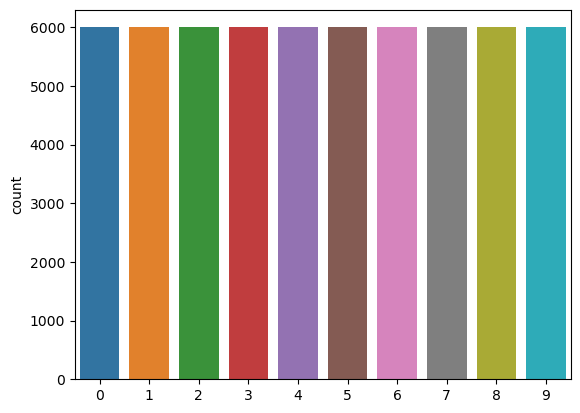

In [6]:
sns.countplot(x=np.argmax(trainy, axis=1))

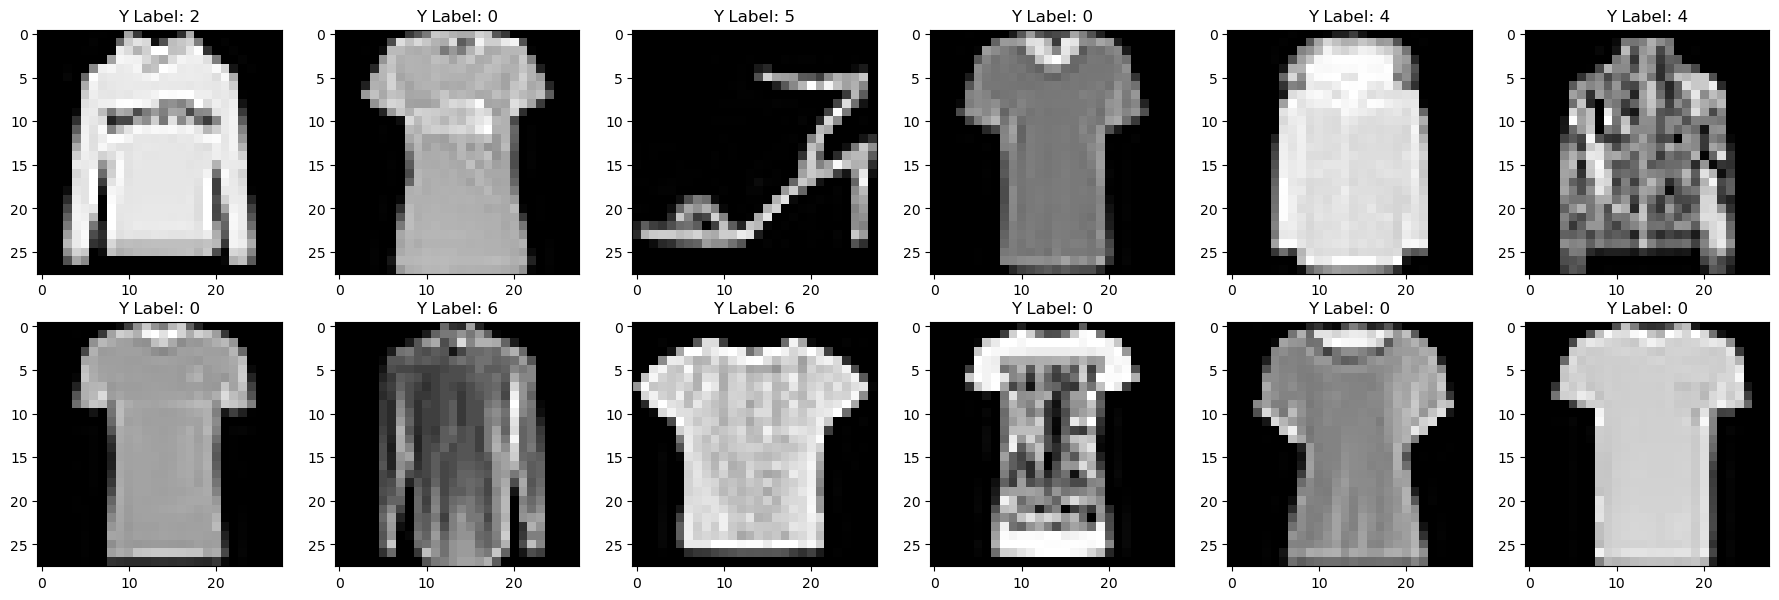

In [7]:
fig, ax = plt.subplots(2, 6, figsize = (18,6))
img_disp = np.random.randint(0, len(trainy), (2,6))
for i in range(2):
    for j in range(6):
        ax[i,j].imshow(trainX[img_disp[i,j],:,:,0], cmap = 'gray')
        ax[i,j].set_title(f'Y Label: {np.argmax(trainy[img_disp[i,j]])}')


plt.tight_layout()



# CNN Architecture

In [9]:
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(image_size[0], image_size[1], 1)))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(128, 
                 kernel_size=(3, 3),
                 padding="SAME", 
                 activation='relu'))

model.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(AveragePooling2D((2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(Conv2D(1024, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])